In [3]:
import tensorflow as tf
from tensorflow import keras

tf.__version__, keras.__version__

('2.10.0', '2.10.0')

Classification DNN using Keras Sequential API

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
y_train[0], class_names[y_train[0]]

(4, 'Coat')

Image shape: (28, 28)



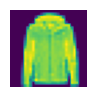

In [23]:
import matplotlib.pyplot as plt

print("Image shape: " + str(X_train[0].shape) + "\n")

plt.figure(figsize=(1, 1))
plt.imshow(X_train[0])
plt.axis("off")
plt.show()

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2022-09-22 13:16:34.325936: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-22 13:16:34.326261: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max


In [26]:
#Alternative way of doing the same:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.layers

In [32]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [33]:
model.get_layer('dense_3') is hidden1

True

In [36]:
weights, biases = hidden1.get_weights()
weights, weights.shape

(array([[-0.00514141,  0.02194236, -0.01781379, ...,  0.07382935,
         -0.02373501,  0.06358339],
        [-0.03367042,  0.01164905, -0.05591521, ..., -0.05726631,
         -0.01404398,  0.00208317],
        [-0.03174377,  0.07203485, -0.01024017, ...,  0.02401216,
         -0.00873   ,  0.04127569],
        ...,
        [-0.00272794, -0.05984571, -0.01982886, ..., -0.00322458,
         -0.04756613,  0.06375334],
        [-0.00157102, -0.02240926, -0.02162092, ..., -0.02173708,
         -0.02743725, -0.00642075],
        [-0.02475765, -0.01893289,  0.03171214, ...,  0.03322469,
         -0.06970531,  0.0434451 ]], dtype=float32),
 (784, 300))

In [37]:
biases, biases.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [38]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [39]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    validation_data=(X_valid, y_valid)
)

Epoch 1/30


2022-09-22 13:35:13.693673: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-22 13:35:13.831804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7339 - accuracy: 0.7603

2022-09-22 13:35:23.813708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 11s 5ms/step - loss: 0.7339 - accuracy: 0.7603 - val_loss: 0.5025 - val_accuracy: 0.8300
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4890 - accuracy: 0.8298 - val_loss: 0.4492 - val_accuracy: 0.8476
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4443 - accuracy: 0.8434 - val_loss: 0.4222 - val_accuracy: 0.8546
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4175 - accuracy: 0.8532 - val_loss: 0.3983 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3967 - accuracy: 0.8602 - val_loss: 0.3932 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3811 - accuracy: 0.8655 - val_loss: 0.3900 - val_accuracy: 0.8634
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3673 - accuracy: 0.8702 - val_loss: 0.3700 - val_accuracy: 0.8690
Ep

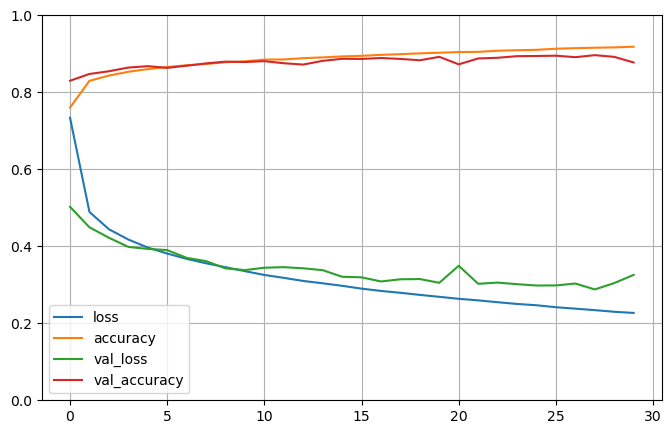

In [40]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3601 - accuracy: 0.8672


[0.36007604002952576, 0.8672000169754028]

In [42]:
#We now make predictions using the trained model
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 124ms/step


2022-09-22 13:59:10.940833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

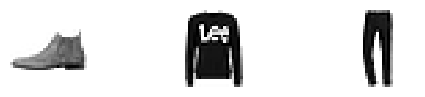

In [46]:
import matplotlib as mpl

fig = plt.figure(figsize=(6, 1))
for index in range(3):
    sub = fig.add_subplot(1, 3, index + 1)
    sub.imshow(X_new[index], cmap = mpl.cm.binary, interpolation="nearest")
    sub.axis("off")

In [71]:
proba_index = y_proba.argmax(axis=1)
[class_names[index] for index in proba_index]

['Ankle boot', 'Pullover', 'Trouser']

In [69]:
y_test[:3], proba_index

(array([9, 2, 1], dtype=uint8), array([9, 2, 1]))

Regression DNN using Keras Sequential API

In [74]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [78]:
X_train.shape

(11610, 8)

In [81]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(1)
])
model.compile(
    loss="mean_squared_error",
    optimizer="sgd"
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                270       
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [82]:
history = model.fit(
    X_train, y_train,
    epochs = 20,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
 45/363 [==>...........................] - ETA: 1s - loss: 2.3776

2022-09-22 14:54:28.347410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 1.4239

2022-09-22 14:54:29.682282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 4ms/step - loss: 1.4239 - val_loss: 0.7082
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5759 - val_loss: 0.4839
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4624 - val_loss: 0.4238
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4297 - val_loss: 0.4056
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4116 - val_loss: 0.3984
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4047 - val_loss: 0.3848
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3944 - val_loss: 0.3813
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3942 - val_loss: 0.3770
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3976 - val_loss: 0.3780
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3915 - val_loss: 0.3686
Epoch 11/2

In [83]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3695


In [86]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 12ms/step


(array([1.2620873, 1.7111522, 1.8400514], dtype=float32),
 array([1.518, 1.056, 1.95 ]))

Building complex models using the Functional API

In [93]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [94]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_18 (Dense)               (None, 30)           930         ['dense_17[0][0]']               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_18[0][0]']         

/Users/amqo/Develop/ML/miniconda3/envs/handsOnTensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [95]:
history = model.fit(
    X_train, y_train,
    epochs = 20,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
 27/363 [=>............................] - ETA: 1s - loss: 5.3173 

2022-09-22 17:08:03.047183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


356/363 [============================>.] - ETA: 0s - loss: 1.6754

2022-09-22 17:08:04.554729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 5ms/step - loss: 1.6579 - val_loss: 0.7661
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7173 - val_loss: 0.6787
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6589 - val_loss: 0.6340
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6231 - val_loss: 0.6017
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5944 - val_loss: 0.5768
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5714 - val_loss: 0.5548
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5518 - val_loss: 0.5368
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5356 - val_loss: 0.5210
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5215 - val_loss: 0.5078
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5096 - val_loss: 0.4978
Epoch 11/2

In [96]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.4582


In [97]:
#Here we send a subset of the features through the wide path, and a different one throught the deep path
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [99]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_20 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_21 (Dense)               (None, 30)           930         ['dense_20[0][0]']               
                                                                                            

In [102]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit(
    (X_train_A, X_train_B), y_train,
    epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid)
)

Epoch 1/20
  1/363 [..............................] - ETA: 1:38 - loss: 4.2121

2022-09-22 17:13:39.479190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 2.0101

2022-09-22 17:13:41.196053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 5ms/step - loss: 2.0101 - val_loss: 0.9304
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8550 - val_loss: 0.7605
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7415 - val_loss: 0.6999
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6951 - val_loss: 0.6643
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6630 - val_loss: 0.6377
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6378 - val_loss: 0.6148
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6165 - val_loss: 0.5952
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5989 - val_loss: 0.5802
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5848 - val_loss: 0.5692
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5736 - val_loss: 0.5584
Epoch 11/2

In [103]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.5212


In [147]:
y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 52ms/step


2022-09-27 15:56:01.172335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [110]:
#Adding extra outputs, here we add an aux. output that will make that segment of the network learn something on its own, without dependint on the rest of the network
#This aux output can be used for regularization, as a common use case
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [111]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_24 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_25 (Dense)               (None, 30)           930         ['dense_24[0][0]']               
                                                                                            

In [113]:
#Each output has its own loss function, and we need to set the weights, in this case making the main one to get most of it, for the training to focus 90% on improving the main output
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train],
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
 10/363 [..............................] - ETA: 2s - loss: 4.0994 - main_output_loss: 3.8440 - aux_output_loss: 6.3984  

2022-09-22 17:30:16.154605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 0.9922 - main_output_loss: 0.8372 - aux_output_loss: 2.3874

2022-09-22 17:30:18.531116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 3s 8ms/step - loss: 0.9922 - main_output_loss: 0.8372 - aux_output_loss: 2.3874 - val_loss: 0.5878 - val_main_output_loss: 0.5304 - val_aux_output_loss: 1.1046
Epoch 2/20
363/363 [==============================] - 3s 7ms/step - loss: 0.5680 - main_output_loss: 0.5154 - aux_output_loss: 1.0419 - val_loss: 0.5096 - val_main_output_loss: 0.4607 - val_aux_output_loss: 0.9496
Epoch 3/20
363/363 [==============================] - 3s 7ms/step - loss: 0.5108 - main_output_loss: 0.4668 - aux_output_loss: 0.9068 - val_loss: 0.4720 - val_main_output_loss: 0.4315 - val_aux_output_loss: 0.8370
Epoch 4/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4766 - main_output_loss: 0.4395 - aux_output_loss: 0.8107 - val_loss: 0.4534 - val_main_output_loss: 0.4201 - val_aux_output_loss: 0.7530
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4569 - main_output_loss: 0.4258 - aux_output_loss: 0.7366 - val_loss: 0.4337 - 

In [114]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 1s 4ms/step - loss: 0.3938 - main_output_loss: 0.3808 - aux_output_loss: 0.5113


In [117]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main.flatten(), y_pred_aux.flatten()

1/1 [==============================] - 0s 13ms/step


(array([1.0335037, 1.7891495, 1.773598 ], dtype=float32),
 array([1.3626611, 1.7393243, 2.486218 ], dtype=float32))

Using the Subclassing API to build Dynamic Models

In [132]:
#Here we are creating exactly the same model as the last one, but using the subclassing API
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

In [134]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train],
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
  9/363 [..............................] - ETA: 2s - loss: 5.1271 - output_1_loss: 4.9497 - output_2_loss: 6.7242  

2022-09-22 17:52:20.660500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 1.0012 - output_1_loss: 0.8842 - output_2_loss: 2.0539

2022-09-22 17:52:23.023356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 3s 7ms/step - loss: 1.0012 - output_1_loss: 0.8842 - output_2_loss: 2.0539 - val_loss: 0.5592 - val_output_1_loss: 0.4985 - val_output_2_loss: 1.1055
Epoch 2/20
363/363 [==============================] - 3s 7ms/step - loss: 0.6144 - output_1_loss: 0.5690 - output_2_loss: 1.0229 - val_loss: 0.8773 - val_output_1_loss: 0.8607 - val_output_2_loss: 1.0271
Epoch 3/20
363/363 [==============================] - 3s 7ms/step - loss: 0.5307 - output_1_loss: 0.4903 - output_2_loss: 0.8944 - val_loss: 0.4793 - val_output_1_loss: 0.4422 - val_output_2_loss: 0.8135
Epoch 4/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4826 - output_1_loss: 0.4490 - output_2_loss: 0.7849 - val_loss: 0.4490 - val_output_1_loss: 0.4179 - val_output_2_loss: 0.7289
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4636 - output_1_loss: 0.4355 - output_2_loss: 0.7166 - val_loss: 0.4339 - val_output_1_loss: 0.4076 - val_output_2_loss

In [135]:
#When we use the summary() with this API, we get a list of layers with no info on how they are connected each other
model.summary()

Model: "wide_and_deep_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            multiple                  210       
                                                                 
 dense_47 (Dense)            multiple                  930       
                                                                 
 dense_48 (Dense)            multiple                  36        
                                                                 
 dense_49 (Dense)            multiple                  31        
                                                                 
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


Using TensorBoard for Visualization

In [136]:
import os
root_logdir = os.path.join(os.curdir, "tensor_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./tensor_logs/run_2022_09_22-18_27_01'

In [138]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train],
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
    callbacks=[tensorboard_cb]
)

Epoch 1/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3546 - output_1_loss: 0.3416 - output_2_loss: 0.4716 - val_loss: 0.3406 - val_output_1_loss: 0.3285 - val_output_2_loss: 0.4495
Epoch 2/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3475 - output_1_loss: 0.3345 - output_2_loss: 0.4654 - val_loss: 0.3380 - val_output_1_loss: 0.3265 - val_output_2_loss: 0.4416
Epoch 3/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3458 - output_1_loss: 0.3329 - output_2_loss: 0.4615 - val_loss: 0.3475 - val_output_1_loss: 0.3369 - val_output_2_loss: 0.4434
Epoch 4/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3487 - output_1_loss: 0.3367 - output_2_loss: 0.4565 - val_loss: 0.3349 - val_output_1_loss: 0.3236 - val_output_2_loss: 0.4366
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3435 - output_1_loss: 0.3312 - output_2_loss: 0.4541 - val_loss: 0.3339 - val_output_1_loss: 0.3228 - val_ou

Fine-Tunning Neural Network Hyperparameters

In [139]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(
        loss="mse",
        optimizer=optimizer
    )
    return model

In [140]:
#We create noe a KerasRegressor based on this function
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

Epoch 1/100


/var/folders/56/ylwcs9v50t1f3njdc2mw2wtm0000gn/T/ipykernel_20230/3945072513.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
/Users/amqo/Develop/ML/miniconda3/envs/handsOnTensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2022-09-27 14:40:55.168824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


353/363 [============================>.] - ETA: 0s - loss: 1.2060

2022-09-27 14:40:56.463236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 4ms/step - loss: 1.1991 - val_loss: 0.7762
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.7107 - val_loss: 0.6712
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.6297 - val_loss: 0.5939
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5695 - val_loss: 0.5406
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5296 - val_loss: 0.5071
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5014 - val_loss: 0.4840
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4797 - val_loss: 0.4646
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4656 - val_loss: 0.4539
Epoch 9/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4571 - val_loss: 0.4456
Epoch 10/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4466 - val_loss: 0.4364
E

In [141]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3588


In [142]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 37ms/step


2022-09-27 14:44:55.005153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [149]:
#We explore the nmber of hidden layers, number of neuros and learning rate
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

Epoch 1/100


/Users/amqo/Develop/ML/miniconda3/envs/handsOnTensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2022-09-27 16:02:44.836118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


238/242 [============================>.] - ETA: 0s - loss: 2.9357

2022-09-27 16:02:45.919327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 1s 5ms/step - loss: 2.9243 - val_loss: 1.7639
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 1.6042 - val_loss: 1.2369
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 1.1425 - val_loss: 1.0051
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.9427 - val_loss: 0.8833
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.8420 - val_loss: 0.8111
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7819 - val_loss: 0.7627
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7405 - val_loss: 0.7277
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7095 - val_loss: 0.7006
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6844 - val_loss: 0.6785
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6640 - val_loss: 0.6617
E

2022-09-27 16:04:40.944183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/242 [============================>.] - ETA: 0s - loss: 3.2354

2022-09-27 16:04:41.928343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 1s 5ms/step - loss: 3.1885 - val_loss: 2.0246
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 1.6591 - val_loss: 1.3173
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 1.1578 - val_loss: 0.9636
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.8866 - val_loss: 0.7716
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7514 - val_loss: 0.6839
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6920 - val_loss: 0.6445
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6629 - val_loss: 0.6237
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6434 - val_loss: 0.6081
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6290 - val_loss: 0.5963
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6162 - val_loss: 0.5859
E

2022-09-27 16:06:35.647853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


238/242 [============================>.] - ETA: 0s - loss: 2.6066

2022-09-27 16:06:36.623697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 1s 5ms/step - loss: 2.5947 - val_loss: 1.5495
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 1.2749 - val_loss: 1.0536
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.9618 - val_loss: 0.8859
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.8293 - val_loss: 0.8066
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7662 - val_loss: 0.7630
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7299 - val_loss: 0.7339
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7040 - val_loss: 0.7111
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6831 - val_loss: 0.6919
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6651 - val_loss: 0.6744
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6488 - val_loss: 0.6596
E

2022-09-27 16:08:29.706892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 1.2664

2022-09-27 16:08:30.717857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 1s 5ms/step - loss: 1.2664 - val_loss: 0.8446
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7721 - val_loss: 0.7429
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6924 - val_loss: 0.6738
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6381 - val_loss: 0.6247
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5958 - val_loss: 0.5826
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5634 - val_loss: 0.5496
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5327 - val_loss: 0.5261
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5097 - val_loss: 0.5030
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4903 - val_loss: 0.4842
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4758 - val_loss: 0.4731
E

2022-09-27 16:10:23.706537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 1.4198

2022-09-27 16:10:24.699521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 1s 5ms/step - loss: 1.4198 - val_loss: 0.8235
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.8469 - val_loss: 0.6742
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6810 - val_loss: 0.6134
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6183 - val_loss: 0.5756
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5839 - val_loss: 0.5452
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5576 - val_loss: 0.5248
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5356 - val_loss: 0.5058
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5189 - val_loss: 0.4903
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5037 - val_loss: 0.4776
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4919 - val_loss: 0.4700
E

2022-09-27 16:12:17.482212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 1.9723

2022-09-27 16:12:18.484671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 1s 5ms/step - loss: 1.9723 - val_loss: 0.8637
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7636 - val_loss: 0.6722
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6312 - val_loss: 0.5799
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5605 - val_loss: 0.5308
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5205 - val_loss: 0.4992
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4955 - val_loss: 0.4806
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4785 - val_loss: 0.4658
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4657 - val_loss: 0.4551
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4559 - val_loss: 0.4464
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4477 - val_loss: 0.4403
E

2022-09-27 16:14:11.204304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 1.1983

2022-09-27 16:14:12.099009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 1s 5ms/step - loss: 1.1983 - val_loss: 0.6154
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.5117 - val_loss: 0.6009
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5749 - val_loss: 0.5413
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5245 - val_loss: 0.5031
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4922 - val_loss: 0.4799
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4704 - val_loss: 0.4639
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4548 - val_loss: 0.4507
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4437 - val_loss: 0.4418
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4351 - val_loss: 0.4362
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4275 - val_loss: 0.4285
E

2022-09-27 16:16:00.040950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


237/242 [============================>.] - ETA: 0s - loss: 1.2615

2022-09-27 16:16:01.075228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 1s 5ms/step - loss: 1.2475 - val_loss: 0.6583
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6885 - val_loss: 0.5976
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6221 - val_loss: 0.5366
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5956 - val_loss: 0.5122
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5408 - val_loss: 0.4839
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5138 - val_loss: 0.4722
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4876 - val_loss: 0.4537
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4729 - val_loss: 0.4453
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4624 - val_loss: 0.4354
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4535 - val_loss: 0.4292
E

2022-09-27 16:18:09.683295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


241/242 [============================>.] - ETA: 0s - loss: 1.3414

2022-09-27 16:18:10.828423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 2s 6ms/step - loss: 1.3390 - val_loss: 0.6435
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 1.2652 - val_loss: 0.6764
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5985 - val_loss: 0.5426
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5203 - val_loss: 0.4969
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4864 - val_loss: 0.4716
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4662 - val_loss: 0.4572
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4536 - val_loss: 0.4462
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4431 - val_loss: 0.4352
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4362 - val_loss: 0.4282
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4288 - val_loss: 0.4219
E

2022-09-27 16:20:18.835427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 1.3381

2022-09-27 16:20:19.858261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 1s 5ms/step - loss: 1.3381 - val_loss: 0.7293
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 78.2588 - val_loss: 117.2756
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 45403.4102 - val_loss: 58642.9727
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 12668542.0000 - val_loss: 13424494.0000
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 5998683648.0000 - val_loss: 4651012096.0000
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 1201148788736.0000 - val_loss: 1594616053760.0000
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 719364206624768.0000 - val_loss: 549249276182528.0000
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 145373527594237952.0000 - val_loss: 187377929791995904.0000
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 

2022-09-27 16:20:32.868436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/242 [============================>.] - ETA: 0s - loss: 1.4421

2022-09-27 16:20:33.965916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 2s 6ms/step - loss: 1.4197 - val_loss: 0.7714
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 1.7659 - val_loss: 1.3117
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 18.2088 - val_loss: 12.0829
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 172.2676 - val_loss: 111.2951
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 1761.1257 - val_loss: 1210.5555
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 15759.7412 - val_loss: 12746.1836
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 214716.7969 - val_loss: 133544.3906
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 1715087.8750 - val_loss: 1468429.7500
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 23540496.0000 - val_loss: 14980036.0000
Epoch 10/100
242/242 [=========================

2022-09-27 16:20:46.809975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 1.1630

2022-09-27 16:20:47.818206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 1s 5ms/step - loss: 1.1630 - val_loss: 0.8959
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 4.1338 - val_loss: 4.7746
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 115.4407 - val_loss: 129.2024
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 3545.5688 - val_loss: 3250.5125
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 62097.4922 - val_loss: 86037.2266
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 1841707.3750 - val_loss: 2203110.2500
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 44350268.0000 - val_loss: 57352096.0000
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 1629117952.0000 - val_loss: 1479502336.0000
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 39434452992.0000 - val_loss: 38428344320.0000
Epoch 10/100
242/242 

2022-09-27 16:21:00.619521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 2.9007

2022-09-27 16:21:01.721628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 2s 6ms/step - loss: 2.9007 - val_loss: 1.0303
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7629 - val_loss: 0.6002
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5839 - val_loss: 0.5507
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5594 - val_loss: 0.5396
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5499 - val_loss: 0.5335
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5437 - val_loss: 0.5292
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5382 - val_loss: 0.5257
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5338 - val_loss: 0.5232
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5302 - val_loss: 0.5201
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5275 - val_loss: 0.5168
E

2022-09-27 16:21:46.082793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 2.4395

2022-09-27 16:21:47.031684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 1s 5ms/step - loss: 2.4395 - val_loss: 0.9312
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7599 - val_loss: 0.6014
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6215 - val_loss: 0.5661
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5988 - val_loss: 0.5530
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5895 - val_loss: 0.5468
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5801 - val_loss: 0.5387
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5738 - val_loss: 0.5334
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5686 - val_loss: 0.5292
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5634 - val_loss: 0.5253
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5601 - val_loss: 0.5227
E

2022-09-27 16:22:31.247618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


238/242 [============================>.] - ETA: 0s - loss: 3.3469

2022-09-27 16:22:32.174628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 1s 5ms/step - loss: 3.3102 - val_loss: 1.1904
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8807 - val_loss: 0.7150
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6892 - val_loss: 0.6537
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6518 - val_loss: 0.6265
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6308 - val_loss: 0.6082
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6145 - val_loss: 0.5929
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5989 - val_loss: 0.5819
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5901 - val_loss: 0.5707
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5785 - val_loss: 0.5609
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5706 - val_loss: 0.5538
E

2022-09-27 16:23:47.730073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 0.9772

2022-09-27 16:23:49.055113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 2s 6ms/step - loss: 0.9772 - val_loss: 0.5337
Epoch 2/100
242/242 [==============================] - 1s 6ms/step - loss: 0.7728 - val_loss: 0.5248
Epoch 3/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4742 - val_loss: 0.4719
Epoch 4/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4361 - val_loss: 0.4283
Epoch 5/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4143 - val_loss: 0.4175
Epoch 6/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3998 - val_loss: 0.3930
Epoch 7/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3878 - val_loss: 0.3816
Epoch 8/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3782 - val_loss: 0.3741
Epoch 9/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3691 - val_loss: 0.3785
Epoch 10/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3638 - val_loss: 0.3609
E

2022-09-27 16:25:23.685713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 0.7442

2022-09-27 16:25:24.975688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 2s 7ms/step - loss: 0.7442 - val_loss: 0.5497
Epoch 2/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5077 - val_loss: 0.4686
Epoch 3/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4703 - val_loss: 0.4382
Epoch 4/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4453 - val_loss: 0.4278
Epoch 5/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4292 - val_loss: 0.4028
Epoch 6/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4172 - val_loss: 0.3878
Epoch 7/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4060 - val_loss: 0.4112
Epoch 8/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3974 - val_loss: 0.3772
Epoch 9/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3913 - val_loss: 0.3845
Epoch 10/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3838 - val_loss: 0.3797
E

2022-09-27 16:26:47.398795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


239/242 [============================>.] - ETA: 0s - loss: 0.9841

2022-09-27 16:26:48.667050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 2s 6ms/step - loss: 0.9802 - val_loss: 0.5940
Epoch 2/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5458 - val_loss: 0.4837
Epoch 3/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4677 - val_loss: 0.4400
Epoch 4/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4274 - val_loss: 0.4143
Epoch 5/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4092 - val_loss: 0.4175
Epoch 6/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3988 - val_loss: 0.3902
Epoch 7/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3903 - val_loss: 0.3912
Epoch 8/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3853 - val_loss: 0.3805
Epoch 9/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3805 - val_loss: 0.3753
Epoch 10/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3754 - val_loss: 0.3705
E

2022-09-27 16:29:07.818164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 2.0757

2022-09-27 16:29:09.015969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 2s 6ms/step - loss: 2.0757 - val_loss: 0.8343
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7628 - val_loss: 0.6876
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6713 - val_loss: 0.6436
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6310 - val_loss: 0.6089
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6005 - val_loss: 0.5834
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5762 - val_loss: 0.5610
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5545 - val_loss: 0.5422
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5352 - val_loss: 0.5248
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5181 - val_loss: 0.5094
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5036 - val_loss: 0.4954
E

2022-09-27 16:31:20.172819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 1.4397

2022-09-27 16:31:21.405760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 2s 6ms/step - loss: 1.4397 - val_loss: 0.7650
Epoch 2/100
242/242 [==============================] - 1s 6ms/step - loss: 0.7497 - val_loss: 0.6758
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6807 - val_loss: 0.6191
Epoch 4/100
242/242 [==============================] - 1s 6ms/step - loss: 0.6287 - val_loss: 0.5735
Epoch 5/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5864 - val_loss: 0.5403
Epoch 6/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5547 - val_loss: 0.5155
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5306 - val_loss: 0.4949
Epoch 8/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5112 - val_loss: 0.4837
Epoch 9/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4985 - val_loss: 0.4702
Epoch 10/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4872 - val_loss: 0.4607
E

2022-09-27 16:33:33.197729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 1.7536

2022-09-27 16:33:34.381755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 2s 6ms/step - loss: 1.7536 - val_loss: 0.9761
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.8649 - val_loss: 0.7639
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7087 - val_loss: 0.6681
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6341 - val_loss: 0.6058
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5863 - val_loss: 0.5653
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5548 - val_loss: 0.5365
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5309 - val_loss: 0.5143
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5113 - val_loss: 0.4963
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4954 - val_loss: 0.4831
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4818 - val_loss: 0.4688
E

2022-09-27 16:35:45.308533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 1.7919

2022-09-27 16:35:46.692336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 2s 7ms/step - loss: 1.7919 - val_loss: 0.8437
Epoch 2/100
242/242 [==============================] - 1s 6ms/step - loss: 0.8059 - val_loss: 0.7368
Epoch 3/100
242/242 [==============================] - 1s 6ms/step - loss: 0.7046 - val_loss: 0.6842
Epoch 4/100
242/242 [==============================] - 1s 6ms/step - loss: 0.6575 - val_loss: 0.6400
Epoch 5/100
242/242 [==============================] - 1s 6ms/step - loss: 0.6201 - val_loss: 0.6076
Epoch 6/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5872 - val_loss: 0.5765
Epoch 7/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5614 - val_loss: 0.5525
Epoch 8/100
242/242 [==============================] - 2s 6ms/step - loss: 0.5380 - val_loss: 0.5289
Epoch 9/100
242/242 [==============================] - 2s 6ms/step - loss: 0.5160 - val_loss: 0.5090
Epoch 10/100
242/242 [==============================] - 2s 6ms/step - loss: 0.4964 - val_loss: 0.4930
E

2022-09-27 16:38:22.566765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 2.2869

2022-09-27 16:38:24.020744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 3s 7ms/step - loss: 2.2869 - val_loss: 0.9796
Epoch 2/100
242/242 [==============================] - 2s 7ms/step - loss: 0.8700 - val_loss: 0.7641
Epoch 3/100
242/242 [==============================] - 2s 7ms/step - loss: 0.7449 - val_loss: 0.6938
Epoch 4/100
242/242 [==============================] - 2s 7ms/step - loss: 0.6929 - val_loss: 0.6531
Epoch 5/100
242/242 [==============================] - 2s 7ms/step - loss: 0.6569 - val_loss: 0.6202
Epoch 6/100
242/242 [==============================] - 2s 7ms/step - loss: 0.6266 - val_loss: 0.5907
Epoch 7/100
242/242 [==============================] - 2s 7ms/step - loss: 0.6004 - val_loss: 0.5658
Epoch 8/100
242/242 [==============================] - 2s 7ms/step - loss: 0.5765 - val_loss: 0.5438
Epoch 9/100
242/242 [==============================] - 2s 7ms/step - loss: 0.5548 - val_loss: 0.5235
Epoch 10/100
242/242 [==============================] - 2s 7ms/step - loss: 0.5358 - val_loss: 0.5058
E

2022-09-27 16:41:04.325211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 2.0462

2022-09-27 16:41:05.802577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 2s 7ms/step - loss: 2.0462 - val_loss: 0.9145
Epoch 2/100
242/242 [==============================] - 2s 7ms/step - loss: 0.8449 - val_loss: 0.7416
Epoch 3/100
242/242 [==============================] - 2s 7ms/step - loss: 0.7163 - val_loss: 0.6816
Epoch 4/100
242/242 [==============================] - 2s 7ms/step - loss: 0.6687 - val_loss: 0.6444
Epoch 5/100
242/242 [==============================] - 2s 7ms/step - loss: 0.6330 - val_loss: 0.6114
Epoch 6/100
242/242 [==============================] - 2s 7ms/step - loss: 0.6049 - val_loss: 0.5863
Epoch 7/100
242/242 [==============================] - 2s 7ms/step - loss: 0.5786 - val_loss: 0.5631
Epoch 8/100
242/242 [==============================] - 2s 7ms/step - loss: 0.5549 - val_loss: 0.5409
Epoch 9/100
242/242 [==============================] - 2s 7ms/step - loss: 0.5358 - val_loss: 0.5230
Epoch 10/100
242/242 [==============================] - 2s 7ms/step - loss: 0.5185 - val_loss: 0.5068
E

2022-09-27 16:43:41.098489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 0.9154

2022-09-27 16:43:42.397489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 2s 7ms/step - loss: 0.9154 - val_loss: 0.5217
Epoch 2/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4726 - val_loss: 0.4342
Epoch 3/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4182 - val_loss: 0.4085
Epoch 4/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3952 - val_loss: 0.3951
Epoch 5/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3833 - val_loss: 0.3807
Epoch 6/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3736 - val_loss: 0.3746
Epoch 7/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3636 - val_loss: 0.3735
Epoch 8/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3565 - val_loss: 0.3590
Epoch 9/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3513 - val_loss: 0.3612
Epoch 10/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3439 - val_loss: 0.3480
E

2022-09-27 16:45:37.694877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 1.2512

2022-09-27 16:45:38.970373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 2s 6ms/step - loss: 1.2512 - val_loss: 0.6157
Epoch 2/100
242/242 [==============================] - 1s 6ms/step - loss: 1.9610 - val_loss: 1.3214
Epoch 3/100
242/242 [==============================] - 1s 6ms/step - loss: 4427.7007 - val_loss: 56277151744.0000
Epoch 4/100
242/242 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 2s 6ms/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 2s 6ms/step - loss: nan - val_loss: nan
Epoch 11/100
121/121 [========

2022-09-27 16:45:54.535802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 0.7957

2022-09-27 16:45:55.904871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 2s 7ms/step - loss: 0.7957 - val_loss: 0.5143
Epoch 2/100
242/242 [==============================] - 2s 6ms/step - loss: 6.2654 - val_loss: 0.5039
Epoch 3/100
242/242 [==============================] - 2s 6ms/step - loss: 131.9778 - val_loss: 1.4699
Epoch 4/100
242/242 [==============================] - 2s 7ms/step - loss: 0.9464 - val_loss: 0.7074
Epoch 5/100
242/242 [==============================] - 2s 6ms/step - loss: 0.7032 - val_loss: 0.6449
Epoch 6/100
242/242 [==============================] - 2s 6ms/step - loss: 0.6423 - val_loss: 0.5999
Epoch 7/100
242/242 [==============================] - 2s 6ms/step - loss: 0.6036 - val_loss: 0.5476
Epoch 8/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5667 - val_loss: 0.5102
Epoch 9/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5309 - val_loss: 0.4868
Epoch 10/100
242/242 [==============================] - 2s 6ms/step - loss: 0.5145 - val_loss: 0.5509

2022-09-27 16:47:20.361542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 1.4663

2022-09-27 16:47:21.379777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 1s 5ms/step - loss: 1.4663 - val_loss: 0.6949
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7357 - val_loss: 0.6286
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7398 - val_loss: 0.6228
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 1.4218 - val_loss: 0.7905
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 13.2657 - val_loss: 2.3813
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 63.7922 - val_loss: 12.9680
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 1062.1302 - val_loss: 118.0177
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 4944.9351 - val_loss: 1002.4811
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 49483.2148 - val_loss: 8816.1562
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 462268

2022-09-27 16:47:36.654097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


241/242 [============================>.] - ETA: 0s - loss: 1.5266

2022-09-27 16:47:37.702848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 2s 5ms/step - loss: 1.5240 - val_loss: 0.5930
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.9698 - val_loss: 0.6429
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.9257 - val_loss: 0.5289
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 1.2902 - val_loss: 0.7103
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 1.6326 - val_loss: 0.5912
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 2.5015 - val_loss: 0.8243
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 2.9745 - val_loss: 0.7382
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 5.0380 - val_loss: 1.1527
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 7.0689 - val_loss: 1.0758
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 11.9992 - val_loss: 2.0295


2022-09-27 16:47:52.646515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


241/242 [============================>.] - ETA: 0s - loss: 1.7109

2022-09-27 16:47:53.676727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 1s 5ms/step - loss: 1.7072 - val_loss: 0.6295
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7525 - val_loss: 0.5462
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 1.8358 - val_loss: 1.0260
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 6.7264 - val_loss: 1.8054
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 31.5176 - val_loss: 9.7091
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 152.7486 - val_loss: 41.0308
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 790.9796 - val_loss: 209.1393
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 3754.6243 - val_loss: 1088.0309
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 19564.6445 - val_loss: 5184.1963
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 102329

/Users/amqo/Develop/ML/miniconda3/envs/handsOnTensorflow/lib/python3.9/site-packages/sklearn/model_selection/_search.py:953: UserWarning: One or more of the test scores are non-finite: [-4.04170712e-01 -3.43181173e-01 -3.43051056e-01 -8.71818970e+23
 -5.26007523e-01 -3.16648126e-01 -3.64183545e-01 -3.39184821e-01
             nan -1.34334006e+07]
  warnings.warn(


 10/363 [..............................] - ETA: 2s - loss: 4.6453  

2022-09-27 16:48:07.966463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 1.1889

2022-09-27 16:48:09.999262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 3s 6ms/step - loss: 1.1889 - val_loss: 0.5868
Epoch 2/100
363/363 [==============================] - 2s 6ms/step - loss: 0.6341 - val_loss: 0.4830
Epoch 3/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4567 - val_loss: 0.4267
Epoch 4/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4249 - val_loss: 0.4031
Epoch 5/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4095 - val_loss: 0.4219
Epoch 6/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3954 - val_loss: 0.3959
Epoch 7/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3890 - val_loss: 0.3882
Epoch 8/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3807 - val_loss: 0.3788
Epoch 9/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3726 - val_loss: 0.3742
Epoch 10/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3654 - val_loss: 0.3598
E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x31d4151c0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x307151b50>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [150]:
rnd_search_cv.best_params_

{'learning_rate': 0.010458464896594745, 'n_hidden': 3, 'n_neurons': 17}

In [151]:
rnd_search_cv.best_score_

-0.31664812564849854

In [152]:
model = rnd_search_cv.best_estimator_.model

In [153]:
model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

Epoch 1/100
363/363 [==============================] - 2s 5ms/step - loss: 0.2798 - val_loss: 0.2931
Epoch 2/100
363/363 [==============================] - 2s 5ms/step - loss: 0.2802 - val_loss: 0.2937
Epoch 3/100
363/363 [==============================] - 2s 5ms/step - loss: 0.2783 - val_loss: 0.2921
Epoch 4/100
363/363 [==============================] - 2s 5ms/step - loss: 0.2778 - val_loss: 0.2990
Epoch 5/100
363/363 [==============================] - 2s 5ms/step - loss: 0.2770 - val_loss: 0.3017
Epoch 6/100
363/363 [==============================] - 2s 5ms/step - loss: 0.2779 - val_loss: 0.2986
Epoch 7/100
363/363 [==============================] - 2s 5ms/step - loss: 0.2778 - val_loss: 0.2933
Epoch 8/100
363/363 [==============================] - 2s 5ms/step - loss: 0.2776 - val_loss: 0.2920
Epoch 9/100
363/363 [==============================] - 2s 5ms/step - loss: 0.2768 - val_loss: 0.2918
Epoch 10/100
363/363 [==============================] - 2s 5ms/step - loss: 0.2774 - val_lo

In [160]:
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 12ms/step
